In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
print(tf.__version__)

2.0.0-beta1


In [2]:
gbpJpy_data = pd.read_excel("DAT_XLSX_GBPJPY_M1_201911.xlsx", names=["timestamp","open","max","min","close","else"])

In [4]:
gbpJpy_data.head()

,timestamp,open,max,min,close,else
0,2019-11-01 00:01:00,139.986,139.987,139.985,139.987,0
1,2019-11-01 00:02:00,139.988,139.999,139.986,139.993,0
2,2019-11-01 00:03:00,139.991,139.996,139.990,139.993,0
3,2019-11-01 00:04:00,139.994,139.998,139.992,139.994,0
4,2019-11-01 00:05:00,139.995,140.001,139.992,139.992,0


In [5]:
gbpJpy_data = gbpJpy_data.drop("else", axis=1)

In [6]:
gbpJpy_data.tail()

,timestamp,open,max,min,close
8146,2019-11-08 16:54:00,139.563,139.619,139.563,139.594
8147,2019-11-08 16:55:00,139.584,139.595,139.566,139.588
8148,2019-11-08 16:56:00,139.590,139.590,139.571,139.579
8149,2019-11-08 16:57:00,139.573,139.573,139.548,139.552
8150,2019-11-08 16:58:00,139.551,139.571,139.504,139.557


In [8]:
# gbpJpy_data['delta'] = gbpJpy_data['close']-gbpJpy_data['open']

In [9]:
gbpJpy_data.head()

,timestamp,open,max,min,close,delta
0,2019-11-01 00:01:00,139.986,139.987,139.985,139.987,0.001
1,2019-11-01 00:02:00,139.988,139.999,139.986,139.993,0.005
2,2019-11-01 00:03:00,139.991,139.996,139.990,139.993,0.002
3,2019-11-01 00:04:00,139.994,139.998,139.992,139.994,0.000
4,2019-11-01 00:05:00,139.995,140.001,139.992,139.992,-0.003


### Create date & time from timestamp

In [10]:
gbpJpy_data['date'] = [d.date() for d in gbpJpy_data['timestamp']]
gbpJpy_data['time'] = [d.time() for d in gbpJpy_data['timestamp']]

In [14]:
# euroUSD_data['date'] = euroUSD_data.timestamp.apply(lambda x: x.date())
# euroUSD_data['time'] = euroUSD_data.timestamp.apply(lambda x: x.time())

In [11]:
gbpJpy_data.head()

,timestamp,open,max,min,close,delta,date,time
0,2019-11-01 00:01:00,139.986,139.987,139.985,139.987,0.001,2019-11-01,00:01:00
1,2019-11-01 00:02:00,139.988,139.999,139.986,139.993,0.005,2019-11-01,00:02:00
2,2019-11-01 00:03:00,139.991,139.996,139.990,139.993,0.002,2019-11-01,00:03:00
3,2019-11-01 00:04:00,139.994,139.998,139.992,139.994,0.000,2019-11-01,00:04:00
4,2019-11-01 00:05:00,139.995,140.001,139.992,139.992,-0.003,2019-11-01,00:05:00


In [16]:
# euroUSD_data.date = pd.to_datetime(euroUSD_data.date, format="%Y-%m-%d")


In [17]:
# euroUSD_data.time = pd.to_datetime(euroUSD_data.time, format="%H:%M:%S")

In [18]:
# euroUSD_data.time = euroUSD_data.timestamp.apply(lambda x: x.time())

In [19]:
# euroUSD_data.time.dtype

In [12]:
gbpJpy_data.head()

,timestamp,open,max,min,close,delta,date,time
0,2019-11-01 00:01:00,139.986,139.987,139.985,139.987,0.001,2019-11-01,00:01:00
1,2019-11-01 00:02:00,139.988,139.999,139.986,139.993,0.005,2019-11-01,00:02:00
2,2019-11-01 00:03:00,139.991,139.996,139.990,139.993,0.002,2019-11-01,00:03:00
3,2019-11-01 00:04:00,139.994,139.998,139.992,139.994,0.000,2019-11-01,00:04:00
4,2019-11-01 00:05:00,139.995,140.001,139.992,139.992,-0.003,2019-11-01,00:05:00


In [13]:
gbpJpy_data.date = pd.to_datetime(gbpJpy_data.date, format="%Y-%m-%d")

In [14]:
gbpJpy_data_tst = gbpJpy_data[gbpJpy_data['date']=="2019-11-08"].reset_index()

In [16]:
gbpJpy_data_tst.head()

,index,timestamp,open,max,min,close,delta,date,time
0,7132,2019-11-08 00:00:00,139.969,139.969,139.956,139.960,-0.009,2019-11-08,00:00:00
1,7133,2019-11-08 00:01:00,139.959,139.960,139.943,139.947,-0.012,2019-11-08,00:01:00
2,7134,2019-11-08 00:02:00,139.947,139.948,139.944,139.948,0.001,2019-11-08,00:02:00
3,7135,2019-11-08 00:03:00,139.947,139.949,139.946,139.949,0.002,2019-11-08,00:03:00
4,7136,2019-11-08 00:04:00,139.949,139.956,139.949,139.956,0.007,2019-11-08,00:04:00


In [18]:
gbpJpy_data_tst.head()

,index,timestamp,open,max,min,close,delta,date,time
0,7132,2019-11-08 00:00:00,139.969,139.969,139.956,139.960,-0.009,2019-11-08,00:00:00
1,7133,2019-11-08 00:01:00,139.959,139.960,139.943,139.947,-0.012,2019-11-08,00:01:00
2,7134,2019-11-08 00:02:00,139.947,139.948,139.944,139.948,0.001,2019-11-08,00:02:00
3,7135,2019-11-08 00:03:00,139.947,139.949,139.946,139.949,0.002,2019-11-08,00:03:00
4,7136,2019-11-08 00:04:00,139.949,139.956,139.949,139.956,0.007,2019-11-08,00:04:00


C:\Users\hero144\.conda\envs\py36\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


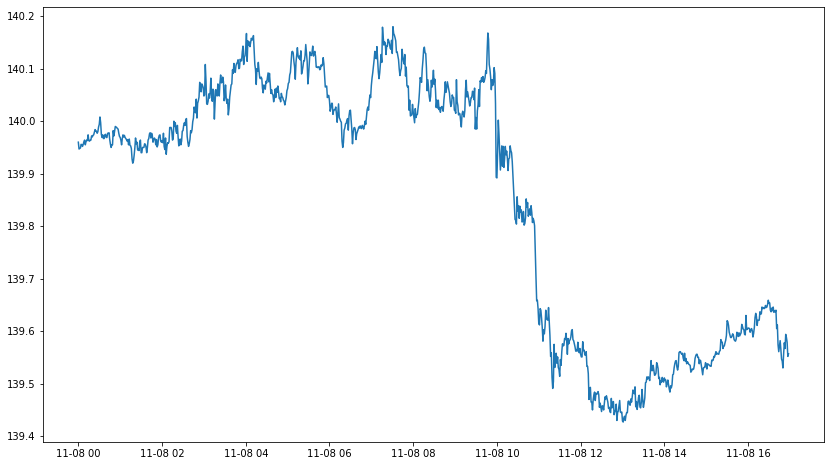

In [19]:
plt.figure(figsize=(14,8))
plt.plot(gbpJpy_data_tst.timestamp, gbpJpy_data_tst.close)

In [20]:
gbpJpy_data_tst['time_'] = gbpJpy_data_tst.index

In [21]:
gbpJpy_data_tst = gbpJpy_data_tst.drop("index", axis=1)

In [22]:
gbpJpy_data_tst = gbpJpy_data_tst.drop("time", axis=1)

In [23]:
gbpJpy_data_tst.head()

,timestamp,open,max,min,close,delta,date,time_
0,2019-11-08 00:00:00,139.969,139.969,139.956,139.960,-0.009,2019-11-08,0
1,2019-11-08 00:01:00,139.959,139.960,139.943,139.947,-0.012,2019-11-08,1
2,2019-11-08 00:02:00,139.947,139.948,139.944,139.948,0.001,2019-11-08,2
3,2019-11-08 00:03:00,139.947,139.949,139.946,139.949,0.002,2019-11-08,3
4,2019-11-08 00:04:00,139.949,139.956,139.949,139.956,0.007,2019-11-08,4


In [24]:
len(gbpJpy_data_tst)

1019

In [25]:
gbpJpy_data_tst_final = gbpJpy_data_tst[["close","time_"]]

In [26]:
gbpJpy_data_tst_final.head()

,close,time_
0,139.960,0
1,139.947,1
2,139.948,2
3,139.949,3
4,139.956,4


In [27]:
series = gbpJpy_data_tst_final.close.to_numpy()

In [28]:
series

array([139.96 , 139.947, 139.948, ..., 139.579, 139.552, 139.557])

In [29]:
time = gbpJpy_data_tst_final.time_.to_numpy()

In [30]:
time

array([   0,    1,    2, ..., 1016, 1017, 1018], dtype=int64)

In [33]:
split_time = 800
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [34]:
len(time_valid), len(x_valid)

(219, 219)

In [35]:
window_size = 20
batch_size = 32
shuffle_buffer_size = 800

In [36]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [37]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [140]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

train_set = windowed_dataset(x_train, window_size, batch_size=20, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(40, return_sequences=True),
  tf.keras.layers.SimpleRNN(20),
#   tf.keras.layers.SimpleRNN(20),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 10.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-12, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
39/39 [==============================] - 2s 63ms/step - loss: 134.2740 - mae: 134.7740
Epoch 2/100
39/39 [==============================] - 1s 20ms/step - loss: 134.2053 - mae: 134.7053
Epoch 3/100
39/39 [==============================] - 1s 20ms/step - loss: 134.1300 - mae: 134.6300
Epoch 4/100
39/39 [==============================] - 1s 20ms/step - loss: 134.0513 - mae: 134.5513
Epoch 5/100
39/39 [==============================] - 1s 21ms/step - loss: 133.9683 - mae: 134.4683
Epoch 6/100
39/39 [==============================] - 1s 21ms/step - loss: 133.8801 - mae: 134.3801
Epoch 7/100
39/39 [==============================] - 1s 21ms/step - loss: 133.7858 - mae: 134.2858
Epoch 8/100
39/39 [==============================] - 1s 20ms/step - loss: 133.6842 - mae: 134.1842
Epoch 9/100
39/39 [==============================] - 1s 20ms/step - loss: 133.5740 - mae: 134.0740
Epoch 10/100
39/39 [==============================] - 1s 22ms/step - loss: 133.4538 - mae: 133.9538
Epoch 11/

39/39 [==============================] - 1s 22ms/step - loss: 0.0234 - mae: 0.1659
Epoch 84/100
39/39 [==============================] - 1s 22ms/step - loss: 0.0234 - mae: 0.1663: 0s - loss: 0.0233 - mae: 
Epoch 85/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0238 - mae: 0.1679
Epoch 86/100
39/39 [==============================] - 1s 20ms/step - loss: 0.0246 - mae: 0.1699
Epoch 87/100
39/39 [==============================] - 1s 21ms/step - loss: 0.0252 - mae: 0.1716
Epoch 88/100
39/39 [==============================] - 1s 21ms/step - loss: 0.0247 - mae: 0.1693
Epoch 89/100
39/39 [==============================] - 1s 21ms/step - loss: 0.0240 - mae: 0.1671
Epoch 90/100
39/39 [==============================] - 1s 19ms/step - loss: 0.0245 - mae: 0.1688
Epoch 91/100
39/39 [==============================] - 1s 21ms/step - loss: 0.0258 - mae: 0.1741
Epoch 92/100
39/39 [==============================] - 1s 21ms/step - loss: 0.0288 - mae: 0.1867
Epoch 93/100
39/39 [======

[1e-08, 0.0001, 0, 30]

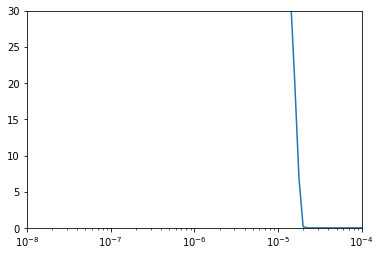

In [142]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [143]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

dataset = windowed_dataset(x_train, window_size, batch_size=20, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  tf.keras.layers.SimpleRNN(20, return_sequences=True),
  tf.keras.layers.SimpleRNN(20),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 50.0)
])

optimizer = tf.keras.optimizers.SGD(lr=8e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=24)

Epoch 1/24
39/39 [==============================] - 3s 67ms/step - loss: 40.8771 - mae: 41.3689
Epoch 2/24
39/39 [==============================] - 1s 21ms/step - loss: 2.4734 - mae: 2.9407
Epoch 3/24
39/39 [==============================] - 1s 21ms/step - loss: 1.5709 - mae: 2.0409
Epoch 4/24
39/39 [==============================] - 1s 20ms/step - loss: 0.1322 - mae: 0.4260
Epoch 5/24
39/39 [==============================] - 1s 21ms/step - loss: 0.0725 - mae: 0.3110
Epoch 6/24
39/39 [==============================] - 1s 21ms/step - loss: 0.0738 - mae: 0.3159
Epoch 7/24
39/39 [==============================] - 1s 21ms/step - loss: 0.0727 - mae: 0.3134
Epoch 8/24
39/39 [==============================] - 1s 21ms/step - loss: 0.0722 - mae: 0.3121
Epoch 9/24
39/39 [==============================] - 1s 21ms/step - loss: 0.0715 - mae: 0.3107
Epoch 10/24
39/39 [==============================] - 1s 22ms/step - loss: 0.0709 - mae: 0.3095
Epoch 11/24
39/39 [==============================] - 1s 2

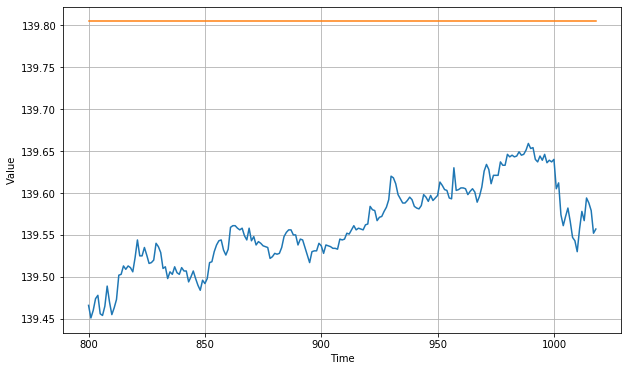

In [144]:
forecast=[]
for time in range(len(series) - window_size):
    forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

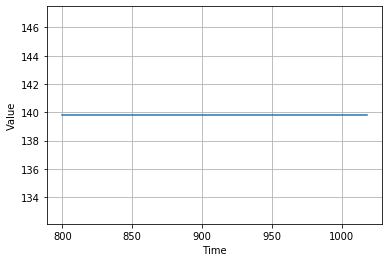

In [146]:

plot_series(time_valid, results)

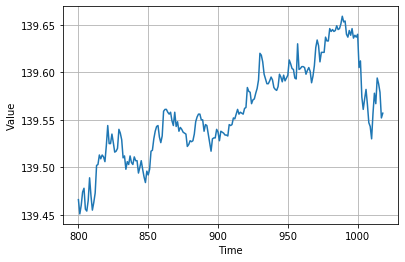

In [147]:
plot_series(time_valid, x_valid)

In [148]:
x_valid

array([139.466, 139.451, 139.46 , 139.474, 139.478, 139.456, 139.454,
       139.465, 139.489, 139.47 , 139.455, 139.463, 139.473, 139.502,
       139.503, 139.513, 139.509, 139.513, 139.511, 139.506, 139.523,
       139.544, 139.525, 139.525, 139.535, 139.526, 139.516, 139.517,
       139.52 , 139.54 , 139.536, 139.529, 139.51 , 139.512, 139.498,
       139.506, 139.503, 139.512, 139.505, 139.503, 139.511, 139.507,
       139.507, 139.494, 139.5  , 139.507, 139.498, 139.49 , 139.484,
       139.496, 139.492, 139.498, 139.517, 139.518, 139.53 , 139.538,
       139.543, 139.544, 139.532, 139.526, 139.533, 139.559, 139.561,
       139.561, 139.558, 139.556, 139.558, 139.549, 139.544, 139.558,
       139.543, 139.548, 139.538, 139.542, 139.54 , 139.537, 139.536,
       139.535, 139.522, 139.524, 139.528, 139.527, 139.528, 139.535,
       139.548, 139.553, 139.556, 139.556, 139.55 , 139.55 , 139.538,
       139.545, 139.544, 139.535, 139.526, 139.517, 139.53 , 139.531,
       139.531, 139.

In [149]:
# results = -results

In [150]:
results

array([139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 139.80437, 139.80437,
       139.80437, 139.80437, 139.80437, 139.80437, 

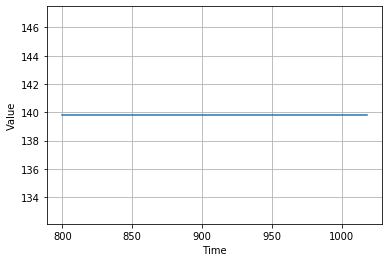

In [151]:
plot_series(time_valid, results)

### Join main table and sample to get real timestamp values

In [152]:
time_valid_df = pd.DataFrame(time_valid, columns=['value'])

In [153]:
final_timestamp = pd.merge(right=gbpJpy_data_tst, left=time_valid_df, how='left', left_on='value',right_on='time_')

In [154]:
final_timestamp = final_timestamp['timestamp']

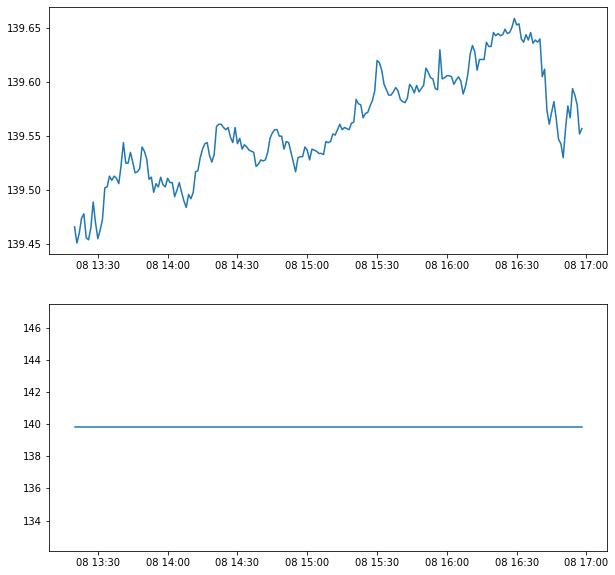

In [155]:
fig, axs = plt.subplots(2,figsize=(10,10))
axs[0].plot(final_timestamp, x_valid)
axs[1].plot(final_timestamp, results)